# Sujet 6 : Autour du Paradoxe de Simpson

### Marie-Félicia Béclin

En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.

Les données sont disponibles dans ce fichier CSV. Vous trouverez sur chaque ligne si la personne fume ou non, si elle est vivante ou décédée au moment de la seconde étude, et son âge lors du premier sondage.

# Import des différentes bibliothèques utilisées

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')

### Consignes

Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe). Vous pourrez proposer une représentation graphique de ces données et calculer des intervalles de confiance si vous le souhaitez. En quoi ce résultat est-il surprenant ?
Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.

Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. Ces régressions vous permettent-elles de conclure sur la nocivité du tabagisme ? Vous pourrez proposer une représentation graphique de ces régressions (en n'omettant pas les régions de confiance).

# I) Import des données

In [2]:
data_file = "Subject6_smoking.csv"
data  = pd.read_csv(data_file, skiprows=0)
data.head()

Smoker Status   Age
0    Yes  Alive  21.0
1    Yes  Alive  19.3
2     No   Dead  57.5
3     No  Alive  47.1
4    Yes  Alive  81.4

# II) Vérification et gestion des données manquantes

In [68]:
df = pd.DataFrame({ "smoker" : data["Smoker"].apply(lambda val : 1 if val=="Yes" else 0),
                    "alive" : data["Status"].apply(lambda val : 1 if val=="Alive" else 0),
                   "age": data["Age"]})

In [69]:
df.describe()

smoker        alive          age
count  1314.000000  1314.000000  1314.000000
mean      0.442922     0.719178    47.359361
std       0.496921     0.449572    19.160667
min       0.000000     0.000000    18.000000
25%       0.000000     0.000000    31.300000
50%       0.000000     1.000000    44.800000
75%       1.000000     1.000000    60.600000
max       1.000000     1.000000    89.900000

Il n'y a pas de données manquantes.

# III) Première visualisation des données

In [4]:
print("Le nombre total de femmes dans l'étude est " +str(len(df["alive"])))
print("Le nombre de femme morte pendant l'étude est "+ str(np.sum(df["alive"] ==0)))
print("Le nombre de femme encore en vie après l'étude est "+ str(np.sum(df["alive"])))
print("Le nombre de femme non-fumeuse "+ str(np.sum(df["smoker"] ==0)))
print("Le nombre de femme fumeuse "+ str(np.sum(df["smoker"])))

Le nombre total de femmes dans l'étude est 1314
Le nombre de femme morte pendant l'étude est 369
Le nombre de femme encore en vie après l'étude est 945
Le nombre de femme non-fumeuse 732
Le nombre de femme fumeuse 582


In [5]:
df_smoker = df[df["smoker"] ==1]
df_nonsmoker = df[df["smoker"] ==0]
df_alive = df[df["alive"] ==1]
df_dead = df[df["alive"] ==0]

On définit une fonction qui calcul de taux de mortalité pour n'importe quel jeux de données comportant la colone "alive".

In [6]:
def mortalite(df):
    return (np.sum(df["alive"] ==0)/len(df["alive"]))

On définit une fonction qui calcul de taux de fumeuses pour n'importe quel jeux de données comportant la colone "smoker".

In [7]:
def smoke_rate(df):
    return (np.sum(df["smoker"] ==1)/len(df["smoker"]))

Text(0.5, 1.0, 'Pourcentage des participantes par âge des groupes fumeuses et non-fumeuses')

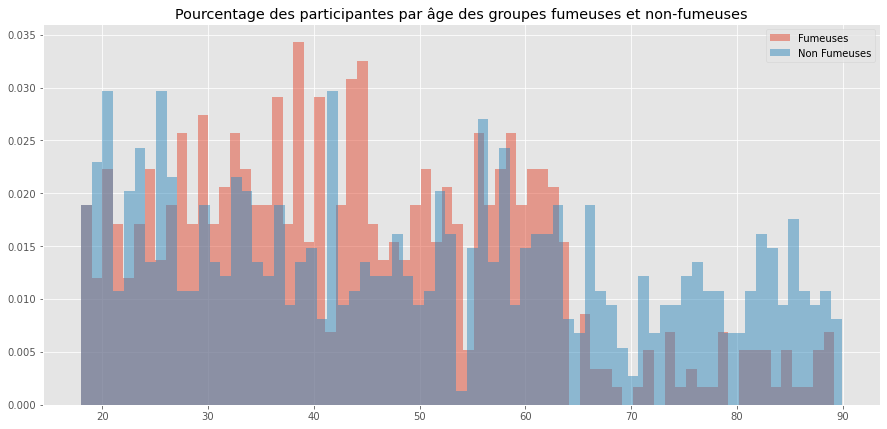

In [8]:
fig, ax = plt.subplots( figsize =(15,7))
ax.hist(df_smoker['age'],
        bins = int(np.max(df_smoker['age']) - np.min(df_smoker['age'])),
        density = True,
        alpha = 0.5, 
        label ="Fumeuses" )

ax.hist(df_nonsmoker['age'], 
        bins = int(np.max(df_nonsmoker['age']) - np.min(df_nonsmoker['age'])), 
        density = True, 
        alpha = 0.5, 
        label = "Non Fumeuses")
plt.legend()
plt.title("Pourcentage des participantes par âge des groupes fumeuses et non-fumeuses")

Text(0.5, 1.0, 'Pourcentage des participantes par âge des femmes en vie et décédées')

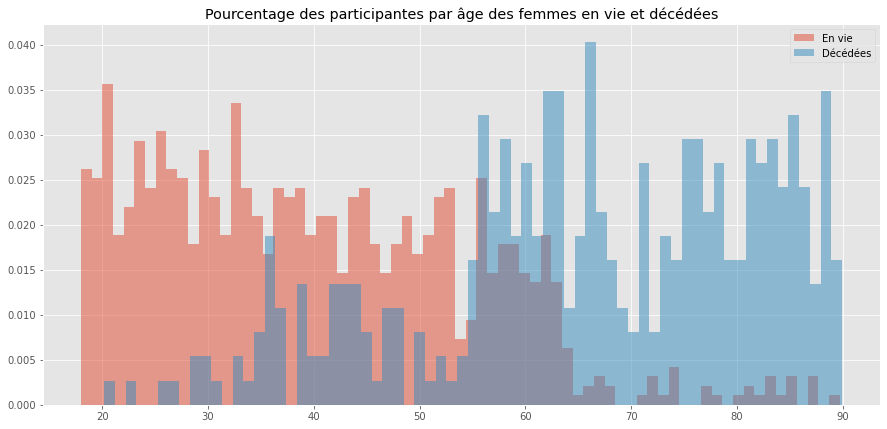

In [9]:
fig, ax = plt.subplots( figsize =(15,7))
ax.hist(df_alive['age'], 
        bins = int(np.max(df_alive['age']) - np.min(df_alive['age'])),
        density = True,
        alpha = 0.5, 
        label ="En vie" )
ax.hist(df_dead['age'],
        bins = int(np.max(df_dead['age']) - np.min(df_dead['age'])), 
        density = True, 
        alpha = 0.5, 
        label = "Décédées")
plt.legend()
plt.title("Pourcentage des participantes par âge des femmes en vie et décédées")

C:\Users\BECLIN Marie-Felicia\AppData\Roaming\Python\Python37\site-packages\matplotlib\cbook\__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


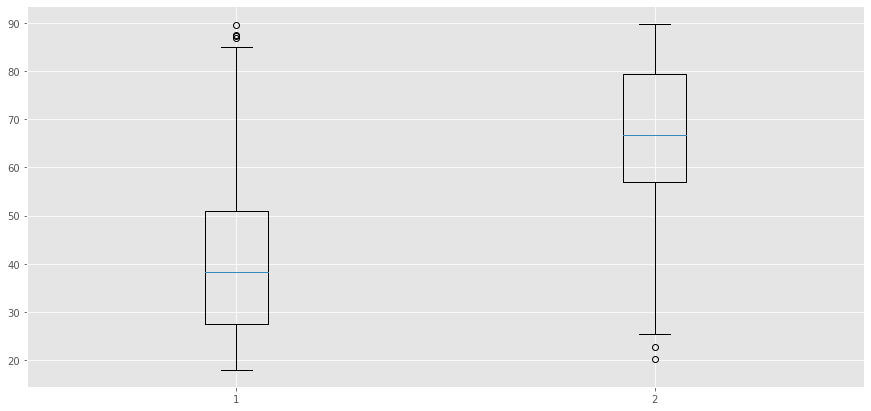

In [10]:
fig, ax = plt.subplots( figsize =(15,7))
ax.boxplot([df_alive["age"],df_dead["age"]])
plt.show()

Les personnes décédées sont plus agées

{'whiskers': [<matplotlib.lines.Line2D at 0x24302698ac8>,
 'caps': [<matplotlib.lines.Line2D at 0x2430277de48>,
 'boxes': [<matplotlib.lines.Line2D at 0x243027737c8>],
 'medians': [<matplotlib.lines.Line2D at 0x243026f9f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x2430280af88>],
 'means': []}

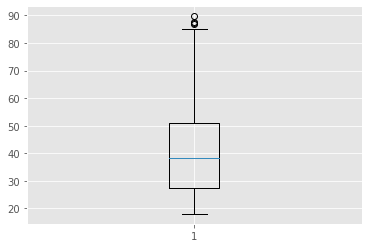

In [11]:
plt.boxplot(df_alive["age"])

# IV) Première analyse

In [12]:
print("Le taux de mortalité des femmes non-fumeuses "+ str(mortalite(df_nonsmoker)))
print("Le taux de mortalité des femmes fumeuses "+ str(mortalite(df_smoker)))
print("Le taux de fumeuses parmi les femmes décédées "+ str(smoke_rate(df_dead)))
print("Le taux de fumeuses parmi les femmes encore en vie "+ str(smoke_rate(df_alive)))

Le taux de mortalité des femmes non-fumeuses 0.31420765027322406
Le taux de mortalité des femmes fumeuses 0.23883161512027493
Le taux de fumeuses parmi les femmes décédées 0.37669376693766937
Le taux de fumeuses parmi les femmes encore en vie 0.4687830687830688


Fumeuse  Non Fumeuse
décédées  23.883162    31.420765
en vie    76.116838    68.579235

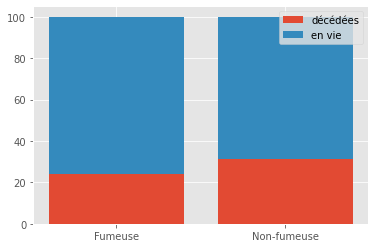

In [13]:
tab = pd.DataFrame({"Fumeuse" : [mortalite(df_smoker)*100 , (1-mortalite(df_smoker))*100],
"Non Fumeuse": [mortalite(df_nonsmoker)*100 , (1-mortalite(df_nonsmoker))*100]}, index = ["décédées", "en vie"])
plt.bar(["Fumeuse", "Non-fumeuse"],tab.loc["décédées"], label = 'décédées' )
plt.bar(["Fumeuse", "Non-fumeuse"],tab.loc["en vie"], bottom = tab.loc["décédées"], label = 'en vie')
plt.legend()
tab.head()

Le taux de décés est plus important chez les non-fumeuses, c'est assez surprenant. 

# V) Analyse par classe d'âge

In [14]:
df["classe"] = df["age"].apply(lambda a : 1 if a<35 else 2 if a<55 else 3 if a <65 else 4)

In [15]:
df_smoker = df[df["smoker"] ==1]
df_nonsmoker = df[df["smoker"] ==0]
df_alive = df[df["alive"] ==1]
df_dead = df[df["alive"] ==0]

Text(0.5, 1.0, "Mortalités des femmes non-fumeuses et fumeuses en fonction de leur classe d'âge")

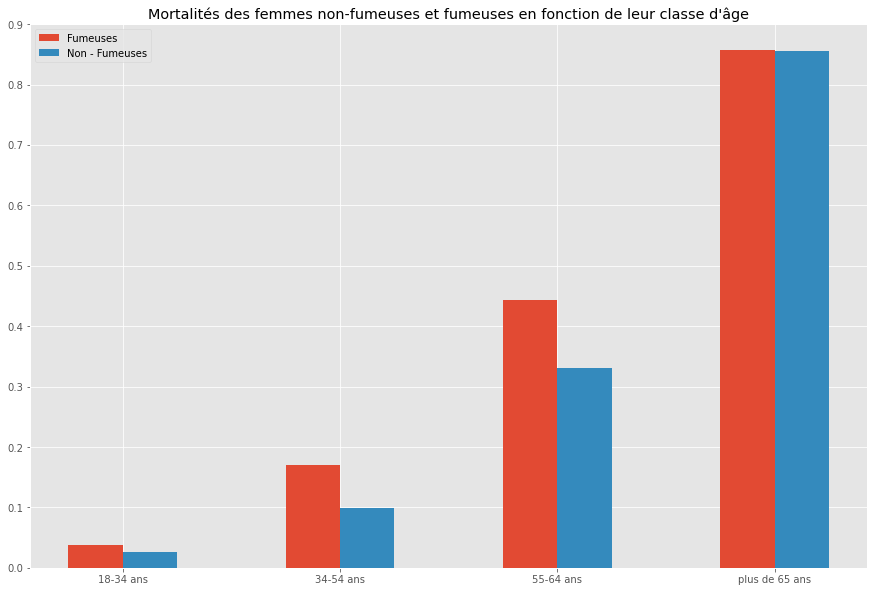

In [16]:
barWidth = 0.25
mortalite_smoker = [mortalite(df_smoker[df_smoker["classe"] == i]) for i in range(1,5)]
mortalite_nonsmoker = [mortalite(df_nonsmoker[df_nonsmoker["classe"] == i]) for i in range(1,5)]
classe = ["18-34 ans", "34-54 ans", "55-64 ans", "plus de 65 ans"]
r1 = range(len(mortalite_smoker))
r2 = [x + barWidth for x in r1]
fig, ax = plt.subplots(1,1,figsize=(15,10))
plt.bar(r1,mortalite_smoker, width = barWidth,label = 'Fumeuses' )
plt.bar(r2,mortalite_nonsmoker,width = barWidth, label = 'Non - Fumeuses')
plt.xticks([r + barWidth / 2 for r in range(len(mortalite_smoker))],classe)
plt.legend()
plt.title("Mortalités des femmes non-fumeuses et fumeuses en fonction de leur classe d'âge")

In [17]:
print("la proportion de femme agées de plus de 65 ans chez les fumeuses est " + str(int(100*np.sum(df_smoker["classe"]==4)/len(df_smoker["classe"]))) +"%")
print("la proportion de femme agées de plus de 65 ans chez les non-fumeuses est "+ str(int(100*np.sum(df_nonsmoker["classe"]==4)/len(df_nonsmoker["classe"])))+"%")

la proportion de femme agées de plus de 65 ans chez les fumeuses est 8%
la proportion de femme agées de plus de 65 ans chez les non-fumeuses est 26%


La mortalité des fumeuses est plus importante chez les jeunes femmes que chez les non-fumeuses. En revanche pour les plus de 65 ans la mortalité est presque la même. La proportion des femmes agées de plus 65 ans est plus grande dans la classe des non-fumeuse que des fumeuses, cela fait augmenter la mortalité dans ce groupe. Le taux de mortalité des non fumeuses est supérieur à celle des fumeuses car le groupe est plus agé. 

# VI) Analyse par classe d'âge

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

## Regression logistique sans la variable fumeur/non-fumeur

In [31]:
X = df[["smoker","age"]]
y = df[["alive"]]

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 0)

modele_regLog = LogisticRegression(random_state = 0, solver = 'liblinear', multi_class = 'auto')

modele_regLog.fit(x_train,y_train)


precision = modele_regLog.score(x_test,y_test)
print(precision*100)

82.97872340425532


C:\Users\BECLIN Marie-Felicia\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [73]:
matrix_threshold = confusion_matrix(
    y_true=y_test, y_pred=modele_regLog.predict(x_test)
)
print(matrix_threshold)

[[ 51  37]
 [ 19 222]]


Text(0.5, 1.0, "probabilité prédite de décés en fonction de l'age")

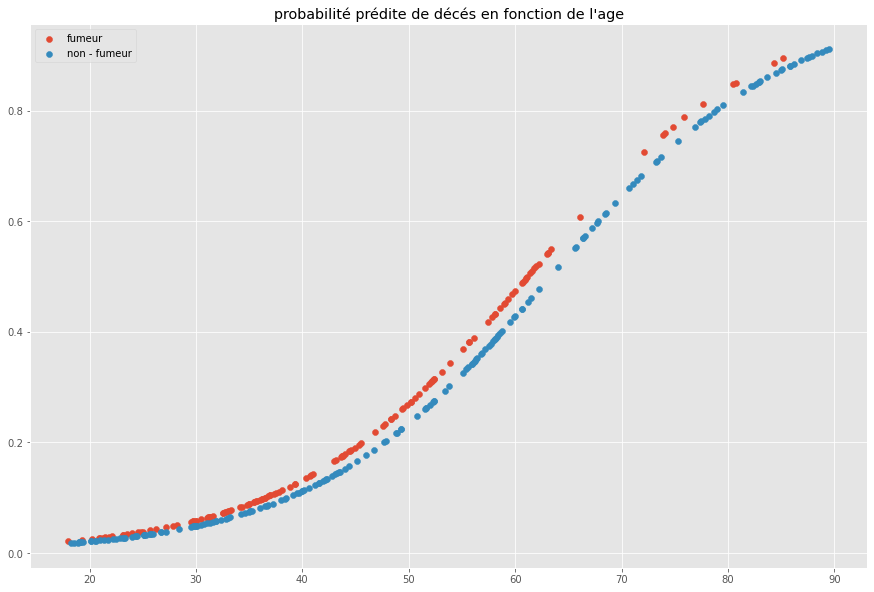

In [74]:
model_output = modele_regLog.predict_proba(x_test)
probas_pred = model_output[:, np.where(modele_regLog.classes_ == 0 )[0]]

fig, ax = plt.subplots(1,1,figsize = (15,10))

plt.scatter(x_test[x_test['smoker'] ==1]["age"],probas_pred[x_test['smoker'] ==1], label = 'fumeur'  )
plt.scatter(x_test[x_test['smoker'] ==0]["age"],probas_pred[x_test['smoker'] ==0], label = 'non - fumeur'  )
plt.legend()
plt.title("probabilité prédite de décés en fonction de l'age")

La courbe de fumeur est au dessus. La probabilité de décès est donc plus élévée pour cette catégorie